In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from numpy import dtype
import pylab as plt


pd.set_option("display.max_columns", 100, 'display.width', 200)

def p(a):
    print(a)

i_ratings = pd.read_csv('./zippedData/imdb.ratings.csv')
i_namebasics = pd.read_csv('./zippedData/imdb.name.basics.csv')
i_titleakas = pd.read_csv('./zippedData/imdb.title.akas.csv')
i_crew = pd.read_csv('./zippedData/imdb.title.crew.csv')
i_titleprincipals = pd.read_csv('./zippedData/imdb.title.principals.csv')
i_titleratings = pd.read_csv('./zippedData/imdb.title.ratings.csv')
b_gross = pd.read_csv('./zippedData/bom.movie_gross.csv')
t_movie = pd.read_csv('./zippedData/tmdb.movies.csv',na_values=[])

b_gross.dropna(inplace=True)
tmovie_bgross = pd.merge(t_movie, b_gross, how='left', on='title')
tmovie_bgross.dropna(inplace=True)
tmovie_bgross.reset_index()
tmovie_bgross=tmovie_bgross.loc[tmovie_bgross['year']>=2010,'genre_ids':'year']
df_cleaned=tmovie_bgross.drop_duplicates().drop(columns='studio')
df_cleaned.replace(to_replace='[,]',value='',inplace=True,regex=True)
df_cleaned['foreign_gross'].astype('float', copy=False)
df_cleaned['domestic_gross'].astype('float', copy=False)
df_cleaned['total_gross'] = df_cleaned['domestic_gross'].astype('float', copy=False)+df_cleaned['foreign_gross'].astype('float', copy=False)
df_totalGross=pd.DataFrame(df_cleaned.loc[:,['genre_ids','total_gross']])


a = np.fromstring(df_totalGross.iat[0,0].replace('[','').replace(']',''),dtype='int32',sep=' ')
genre_mean_gross = {}
genre_occurences = {}
genre_mean_gross_adj = {}
for index, value in df_totalGross.iterrows():
    genres = np.unique(np.fromstring(value['genre_ids'].replace('[','').replace(']',''), dtype='int32',sep=' '))
    for i in genres:
        
        if i not in genre_mean_gross:
            genre_mean_gross[i] = value['total_gross']
            genre_mean_gross_adj[i] = value['total_gross']/genres.size
            genre_occurences[i] = 1
        else:
            genre_mean_gross[i]+=value['total_gross']
            genre_mean_gross_adj[i] += value['total_gross']/genres.size
            genre_occurences[i] += 1
    

for i in genre_mean_gross:
    genre_mean_gross[i]/=genre_occurences[i]
    genre_mean_gross_adj[i]/=genre_occurences[i]
p(genre_mean_gross)
df_genre_gross = pd.DataFrame.from_dict(genre_mean_gross,orient='index', columns=['mean_gross'])
df_genre_gross['mg_adjusted'] = pd.DataFrame.from_dict(genre_mean_gross_adj,orient='index', columns=['mg_adjusted'])['mg_adjusted']
df_genre_gross['occurences'] = pd.DataFrame.from_dict(genre_occurences,orient='index', columns=['occurences'])['occurences']
df_genre_gross.index.rename("genre_id",inplace=True)
p(df_genre_gross)
grossplot = sns.barplot(df_genre_gross['name'].values, df_genre_gross['mean_gross'].values)
grossplot.set(ylabel='Mean Gross Earning (10^8 Dollars)',xlabel='Genre IDs', title='Mean Gross Earnings per Genre')
grossplot.figure.savefig('mean_gross.png')

{12: 360171060.34476537, 14: 293955663.9757764, 16: 336628484.00840336, 10751: 275275598.17469877, 28: 255238522.32788944, 878: 300018515.2694611, 35: 135036376.9352381, 53: 112607083.47712766, 18: 74161555.21989529, 10749: 70943780.32751092, 9648: 91859729.65254237, 80: 101065982.14583333, 36: 66065668.40789474, 27: 90787147.55244756, 37: 137090182.3529412, 10752: 130801785.71428572, 99: 34345492.03174603, 10402: 76469502.12765957, 10770: 120950000.0}
            mean_gross   mg_adjusted  occurences
genre_id                                        
12        3.601711e+08  1.063297e+08         277
14        2.939557e+08  8.395755e+07         161
16        3.366285e+08  9.554795e+07         119
10751     2.752756e+08  7.676676e+07         166
28        2.552385e+08  8.489096e+07         398
878       3.000185e+08  9.326578e+07         167
35        1.350364e+08  5.423309e+07         525
53        1.126071e+08  4.085773e+07         376
18        7.416156e+07  3.177888e+07         764
1074

KeyError: 'name'

In [ ]:
meangrossplot = sns.barplot(df_genre_gross.index, df_genre_gross['mg_adjusted'].values)
meangrossplot.set(ylabel='Mean Gross Earning Adjusted (10^8 Dollars)',xlabel='Genre IDs', title='Mean Gross Earnings Adusted per Genre')
meangrossplot.figure.savefig('mean_gross_adjusted.png')

In [17]:
#uncompleted, sampling data to view accuracy of interpretation


df_gg_sample=df_totalGross.sample(frac=0.3)
arr_gg_sample=np.empty((50000,2))
i=0                          
for index, value in df_gg_sample.iterrows():
    arr_genre_sample = np.fromstring(value['genre_ids'].replace('[','').replace(']',''), dtype='int32',sep=' ')
    for j in arr_genre_sample:
        print(j)
        arr_genre_sample[i,0] = j
        arr_dtype_number[i,1] = value['total_gross']
        i+=1


28


IndexError: too many indices for array

In [49]:
genre_text = pd.read_json('genreid.json')

In [50]:
df_genre_gross['id'] = df_genre_gross.index
df_genre_gross

,mean_gross,mg_adjusted,occurences,id
genre_id,,,,
12,3.601711e+08,1.063297e+08,277,12
14,2.939557e+08,8.395755e+07,161,14
16,3.366285e+08,9.554795e+07,119,16
10751,2.752756e+08,7.676676e+07,166,10751
28,2.552385e+08,8.489096e+07,398,28
878,3.000185e+08,9.326578e+07,167,878
35,1.350364e+08,5.423309e+07,525,35
53,1.126071e+08,4.085773e+07,376,53
18,7.416156e+07,3.177888e+07,764,18


In [51]:
genre_text

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [52]:
df_genre_gross = pd.merge(df_genre_gross, genre_text, how='right', on='id')

In [53]:
df_genre_gross

,mean_gross,mg_adjusted,occurences,id,name
0,3.601711e+08,1.063297e+08,277,12,Adventure
1,2.939557e+08,8.395755e+07,161,14,Fantasy
2,3.366285e+08,9.554795e+07,119,16,Animation
3,2.752756e+08,7.676676e+07,166,10751,Family
4,2.552385e+08,8.489096e+07,398,28,Action
5,3.000185e+08,9.326578e+07,167,878,Science Fiction
6,1.350364e+08,5.423309e+07,525,35,Comedy
7,1.126071e+08,4.085773e+07,376,53,Thriller
8,7.416156e+07,3.177888e+07,764,18,Drama
9,7.094378e+07,2.662588e+07,229,10749,Romance


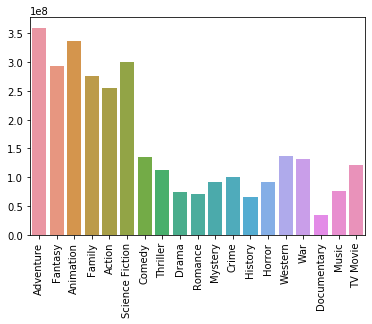

In [64]:
fig, ax = plt.subplots()




grossplot = sns.barplot(df_genre_gross['name'].values, df_genre_gross['mean_gross'].values, ax=ax)

for item in grossplot.get_xticklabels():
    item.set_rotation(90)


In [65]:
grossplot.set(ylabel='Mean Gross Earning (in 100 million Dollars)',xlabel='Genre IDs', title='Mean Gross Earnings per Genre')
grossplot.figure.savefig('mean_gross.png')

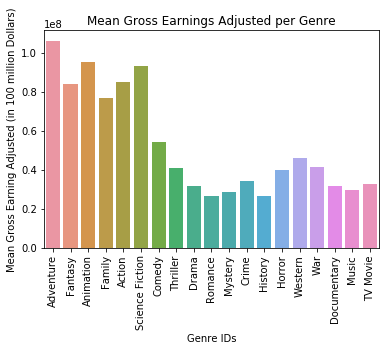

In [63]:
grossplotadjusted = sns.barplot(df_genre_gross['name'].values, df_genre_gross['mg_adjusted'].values)

for item in grossplotadjusted.get_xticklabels():
    item.set_rotation(90)
grossplotadjusted.set(ylabel='Mean Gross Earning Adjusted (in 100 million Dollars)',xlabel='Genre IDs', title='Mean Gross Earnings Adjusted per Genre')
grossplotadjusted.figure.savefig('mean_gross_adjusted.png')